1. Problem Statement
- Today 1.85 million different apps are available for users to download. Android users have even more from which to choose with 2.56 million available through the Google Play Store. These apps have come to play a huge role in the way we live our lives today. The objective is to find the Most Popular Category, find the App with largest number of installs, the App with largest size etc.

2. Data Collection
- The data consists of 20 column and 10841 rows.

Data Cleaning

In [ ]:
#Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [ ]:
#Loading Dataset
df=pd.read_csv("googleplaystore.csv")
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [ ]:
#Rows and Columns in a dataset
df.shape

(10841, 13)

In [ ]:
#Checking datatype and non-null value
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [ ]:
#Descriptive Statistics
df.describe()

,Rating
count,9367.000000
mean,4.193338
std,0.537431
min,1.000000
25%,4.000000
50%,4.300000
75%,4.500000
max,19.000000


In [ ]:
#Check null value in all the columns
df.isnull().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

Observation:
The dataset has missing values.

In [ ]:
#Value count of Rating Columns
df['Rating'].value_counts()   

Rating
4.4     1109
4.3     1076
4.5     1038
4.2      952
4.6      823
4.1      708
4.0      568
4.7      499
3.9      386
3.8      303
5.0      274
3.7      239
4.8      234
3.6      174
3.5      163
3.4      128
3.3      102
4.9       87
3.0       83
3.1       69
3.2       64
2.9       45
2.8       42
2.6       25
2.7       25
2.5       21
2.3       20
2.4       19
1.0       16
2.2       14
1.9       13
2.0       12
1.7        8
1.8        8
2.1        8
1.6        4
1.4        3
1.5        3
1.2        1
19.0       1
Name: count, dtype: int64

In [ ]:
#Value counts for Reviews columns
df['Reviews'].value_counts()

Reviews
0         596
1         272
2         214
3         175
4         137
         ... 
885         1
88486       1
603         1
1195        1
398307      1
Name: count, Length: 6002, dtype: int64

Observation: Outlier is present in Rating and Review columns.

In [ ]:
#unique value of Reviews columns
df['Reviews'].unique()

array(['159', '967', '87510', ..., '603', '1195', '398307'],
      shape=(6002,), dtype=object)

In [ ]:
#Gives numeric value in a column
df['Reviews'].str.isnumeric().sum()  

np.int64(10840)

Observation: One row has non-numeric value.

In [ ]:
#Gives non-numeric row of a column
df[~df['Reviews'].str.isnumeric()]   

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,"1,000+",Free,0,Everyone,NaN,"February 11, 2018",1.0.19,4.0 and up,NaN


In [ ]:
#Copying the dataset
df_copy=df.copy()

In [ ]:
#Deleting the row having non-numeric value
df_copy=df_copy.drop(df_copy.index[10472])

In [ ]:
#New rows and columns of a dataset
df_copy.shape

(10840, 13)

In [ ]:
#Checking for non-numeric value
df_copy[~df_copy['Reviews'].str.isnumeric()]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver


Observation: There is no non-numeric value in a new dataset.

In [ ]:
#Converting object datatype into integer datatype
df_copy['Reviews']=df_copy['Reviews'].astype(int)

In [ ]:
#Unique value of Size column
df_copy['Size'].unique()

array(['19M', '14M', '8.7M', '25M', '2.8M', '5.6M', '29M', '33M', '3.1M',
       '28M', '12M', '20M', '21M', '37M', '2.7M', '5.5M', '17M', '39M',
       '31M', '4.2M', '7.0M', '23M', '6.0M', '6.1M', '4.6M', '9.2M',
       '5.2M', '11M', '24M', 'Varies with device', '9.4M', '15M', '10M',
       '1.2M', '26M', '8.0M', '7.9M', '56M', '57M', '35M', '54M', '201k',
       '3.6M', '5.7M', '8.6M', '2.4M', '27M', '2.5M', '16M', '3.4M',
       '8.9M', '3.9M', '2.9M', '38M', '32M', '5.4M', '18M', '1.1M',
       '2.2M', '4.5M', '9.8M', '52M', '9.0M', '6.7M', '30M', '2.6M',
       '7.1M', '3.7M', '22M', '7.4M', '6.4M', '3.2M', '8.2M', '9.9M',
       '4.9M', '9.5M', '5.0M', '5.9M', '13M', '73M', '6.8M', '3.5M',
       '4.0M', '2.3M', '7.2M', '2.1M', '42M', '7.3M', '9.1M', '55M',
       '23k', '6.5M', '1.5M', '7.5M', '51M', '41M', '48M', '8.5M', '46M',
       '8.3M', '4.3M', '4.7M', '3.3M', '40M', '7.8M', '8.8M', '6.6M',
       '5.1M', '61M', '66M', '79k', '8.4M', '118k', '44M', '695k', '1.6M',
     

In [ ]:
#Replacing M by 000 in size column
df_copy['Size']=df_copy['Size'].str.replace('M','000')

#Replacing k by '' in size column
df_copy['Size']=df_copy['Size'].str.replace('k','')

#Replacing object by Nan value
df_copy['Size']=df_copy['Size'].replace('Varies with device',np.nan)

#Converting object datatype into float datatype
df_copy['Size']=df_copy['Size'].astype(float)

In [ ]:
#Showing the first 5 value in Installs column
df_copy['Installs'].head()

0        10,000+
1       500,000+
2     5,000,000+
3    50,000,000+
4       100,000+
Name: Installs, dtype: object

In [ ]:
#Unique value in a Price column
df_copy['Price'].unique()

array(['0', '$4.99', '$3.99', '$6.99', '$1.49', '$2.99', '$7.99', '$5.99',
       '$3.49', '$1.99', '$9.99', '$7.49', '$0.99', '$9.00', '$5.49',
       '$10.00', '$24.99', '$11.99', '$79.99', '$16.99', '$14.99',
       '$1.00', '$29.99', '$12.99', '$2.49', '$10.99', '$1.50', '$19.99',
       '$15.99', '$33.99', '$74.99', '$39.99', '$3.95', '$4.49', '$1.70',
       '$8.99', '$2.00', '$3.88', '$25.99', '$399.99', '$17.99',
       '$400.00', '$3.02', '$1.76', '$4.84', '$4.77', '$1.61', '$2.50',
       '$1.59', '$6.49', '$1.29', '$5.00', '$13.99', '$299.99', '$379.99',
       '$37.99', '$18.99', '$389.99', '$19.90', '$8.49', '$1.75',
       '$14.00', '$4.85', '$46.99', '$109.99', '$154.99', '$3.08',
       '$2.59', '$4.80', '$1.96', '$19.40', '$3.90', '$4.59', '$15.46',
       '$3.04', '$4.29', '$2.60', '$3.28', '$4.60', '$28.99', '$2.95',
       '$2.90', '$1.97', '$200.00', '$89.99', '$2.56', '$30.99', '$3.61',
       '$394.99', '$1.26', '$1.20', '$1.04'], dtype=object)

In [ ]:
#Removing the characters in Installs and Price Columns 
chars_to_remove=['+',',','$']
cols_to_clean=['Installs','Price']
for item in chars_to_remove:
    for cols in cols_to_clean:
        df_copy[cols]=df_copy[cols].str.replace(item,'')

In [ ]:
#Converting object datatype into integer  
df_copy['Installs']=df_copy['Installs'].astype(int)

#Converting object datatype into float
df_copy['Price']=df_copy['Price'].astype(float)


In [ ]:
#Converting object datatype into datetime format
df_copy['Last Updated']=pd.to_datetime(df_copy['Last Updated'])

#Creating new columns for specific day, month and year
df_copy['Day']=df_copy['Last Updated'].dt.day
df_copy['Month']=df_copy['Last Updated'].dt.month
df_copy['Year']=df_copy['Last Updated'].dt.year

In [ ]:
#Changed datatype and non-null value of all columns
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10840 entries, 0 to 10840
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   App             10840 non-null  object        
 1   Category        10840 non-null  object        
 2   Rating          9366 non-null   float64       
 3   Reviews         10840 non-null  int64         
 4   Size            9145 non-null   float64       
 5   Installs        10840 non-null  int64         
 6   Type            10839 non-null  object        
 7   Price           10840 non-null  float64       
 8   Content Rating  10840 non-null  object        
 9   Genres          10840 non-null  object        
 10  Last Updated    10840 non-null  datetime64[ns]
 11  Current Ver     10832 non-null  object        
 12  Android Ver     10838 non-null  object        
 13  Day             10840 non-null  int32         
 14  Month           10840 non-null  int32         
 15  Year   

In [ ]:
#Duplicated value in App column
df_copy[df_copy.duplicated('App')].shape

(1181, 16)

The dataset has duplicate records.

In [ ]:
#Dropping the duplicate values
df_copy=df_copy.drop_duplicates(subset=['App'],keep='first')

In [ ]:
#New Shape of a dataset
df_copy[df_copy.duplicated('App')].shape

(0, 16)

In [ ]:
#Check for numerical features
numerical_feature=[feature for feature in df_copy.columns if df_copy[feature].dtype != 'O']

#Check for categorical features
categorical_feature=[feature for feature in df_copy.columns if df_copy[feature].dtype == 'O']

#Displaying numerical and categorical features
print(f"\nWe have {len(numerical_feature)} numerical features : {numerical_feature}")
print(f"We have {len(categorical_feature)} categorical features : {categorical_feature}")

We have 9 numerical features: ['Rating', 'Reviews', 'Size', 'Installs', 'Price', 'Last Updated', 'Day', 'Month', 'Year']
We have 7 categorical features: ['App', 'Category', 'Type', 'Content Rating', 'Genres', 'Current Ver', 'Android Ver']

We have 9 numerical features : ['Rating', 'Reviews', 'Size', 'Installs', 'Price', 'Last Updated', 'Day', 'Month', 'Year']
We have 7 categorical features : ['App', 'Category', 'Type', 'Content Rating', 'Genres', 'Current Ver', 'Android Ver']


Visualization diagram

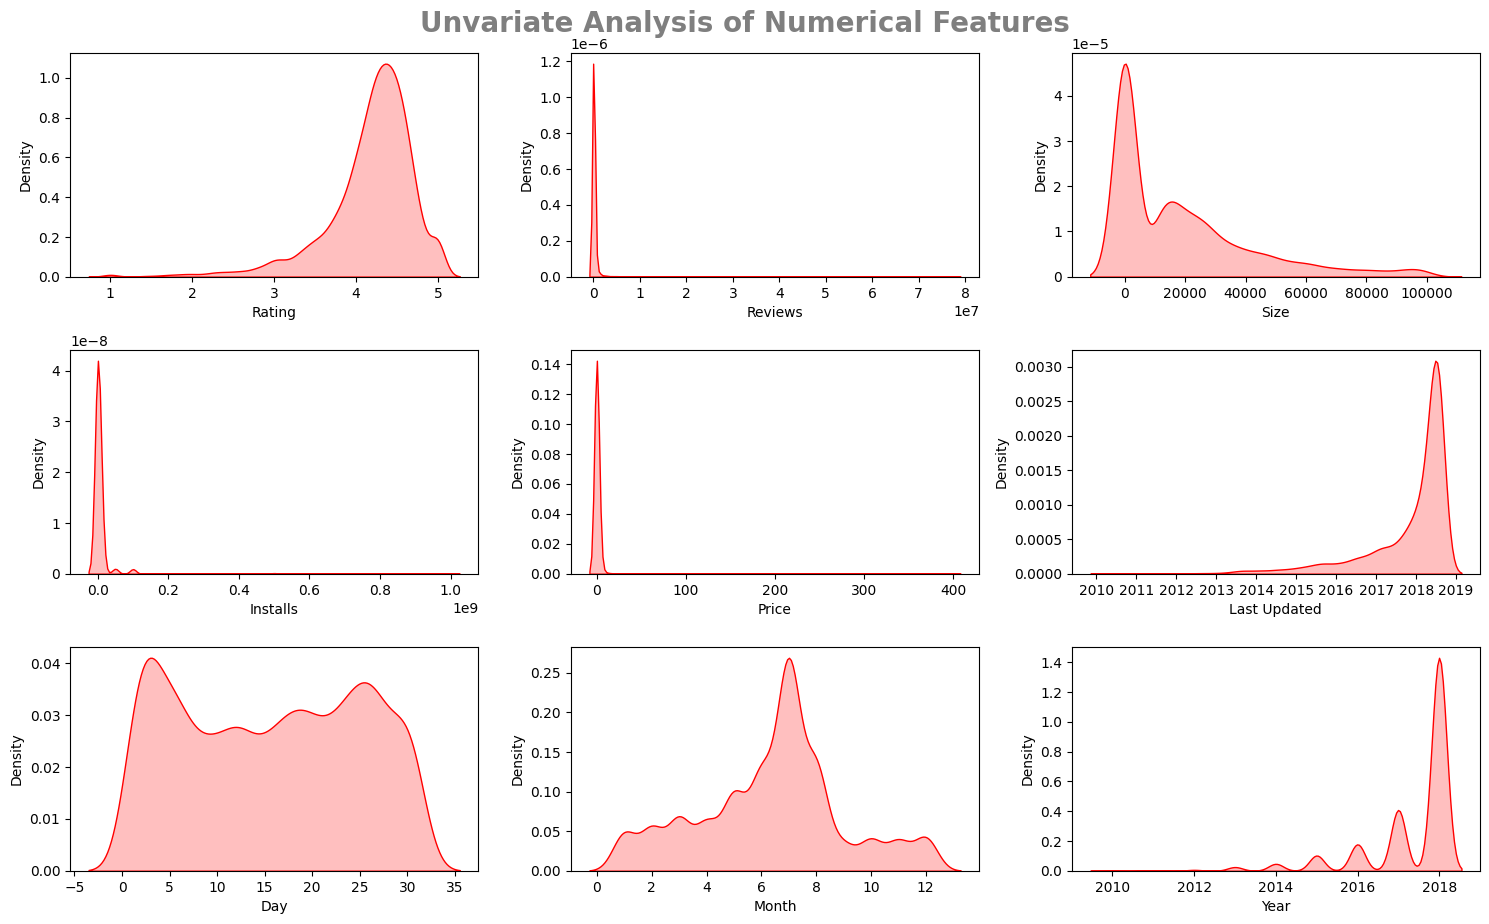

In [ ]:
#Plot data as subplot for numerical features
plt.figure(figsize=(15,15))
plt.suptitle('Unvariate Analysis of Numerical Features',fontsize=20,fontweight='bold',alpha=0.5)
for i in range(0,len(numerical_feature)):
  plt.subplot(5,3,i+1)
  sns.kdeplot(x = df_copy[numerical_feature[i]], shade = True, color = 'r')
  plt.xlabel(numerical_feature[i])
  plt.tight_layout()
    

Observation
- Rating and Year is left skewed while Reviews, Size, Installs and Price are right skewed.

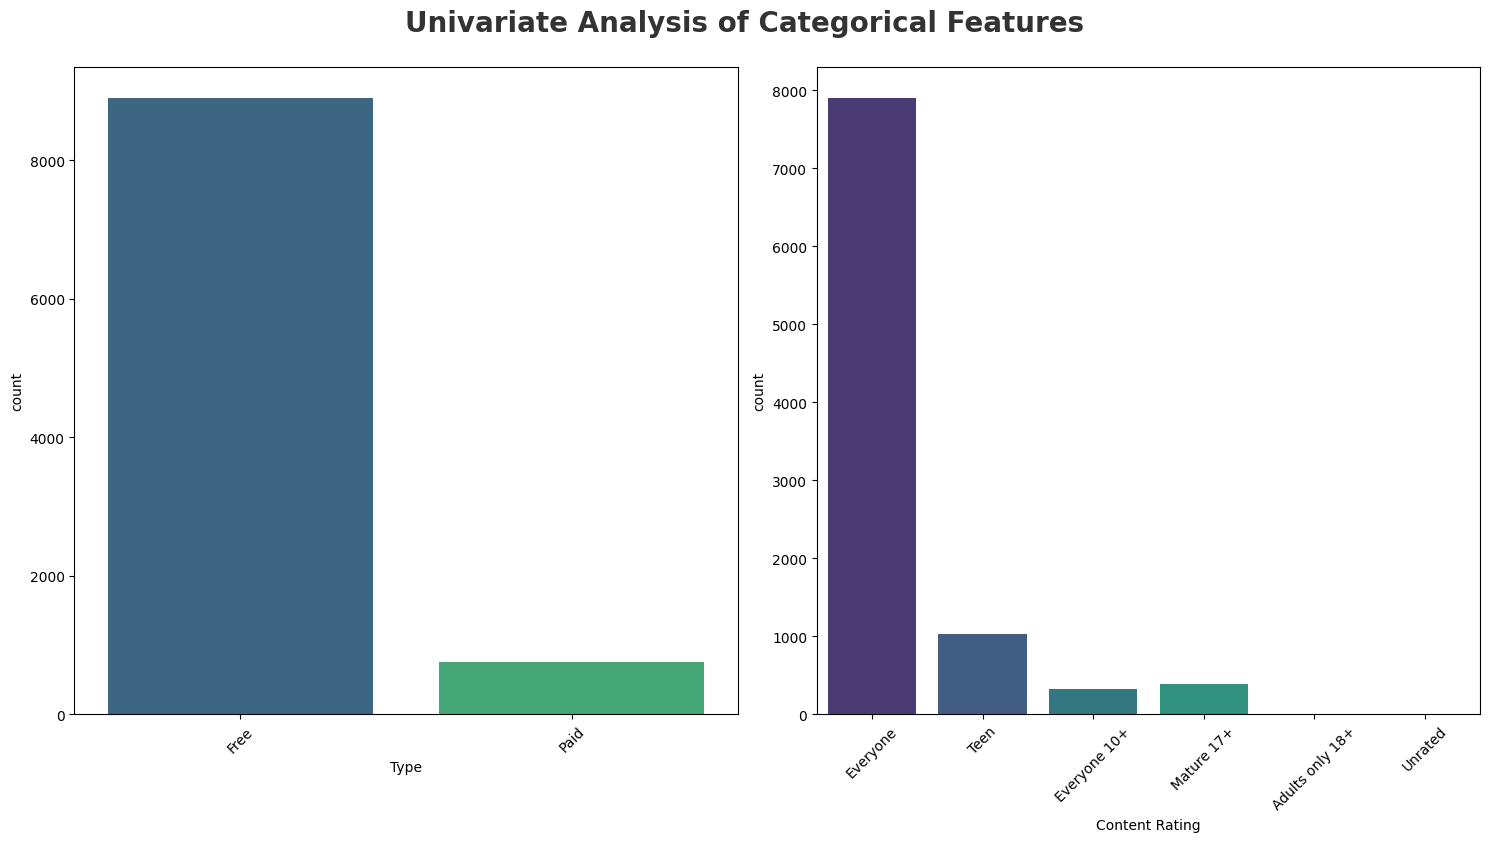

In [ ]:
#Plot data as subplot for categorical features
plt.figure(figsize = (15,15))
plt.suptitle('Univariate Analysis of Categorical Features', fontsize = 20, fontweight = 'bold', alpha = 0.8, y = 1.)
category = ['Type', 'Content Rating']
for i in range(0,len(category)):
    plt.subplot(2,2,i+1)
    sns.countplot(x = df_copy[category[i]], palette = 'viridis')
    plt.xlabel(category[i])
    plt.xticks(rotation = 45)
    plt.tight_layout()

In [ ]:
#most popular category
df_copy['Category'].value_counts()

Category
FAMILY                 1832
GAME                    959
TOOLS                   827
BUSINESS                420
MEDICAL                 395
PERSONALIZATION         376
PRODUCTIVITY            374
LIFESTYLE               369
FINANCE                 345
SPORTS                  325
COMMUNICATION           315
HEALTH_AND_FITNESS      288
PHOTOGRAPHY             281
NEWS_AND_MAGAZINES      254
SOCIAL                  239
BOOKS_AND_REFERENCE     222
TRAVEL_AND_LOCAL        219
SHOPPING                202
DATING                  171
VIDEO_PLAYERS           163
MAPS_AND_NAVIGATION     131
EDUCATION               119
FOOD_AND_DRINK          112
ENTERTAINMENT           102
AUTO_AND_VEHICLES        85
LIBRARIES_AND_DEMO       84
WEATHER                  79
HOUSE_AND_HOME           74
ART_AND_DESIGN           64
EVENTS                   64
PARENTING                60
COMICS                   56
BEAUTY                   53
Name: count, dtype: int64

Observation: Most popular category is Family.

<Axes: ylabel='count'>

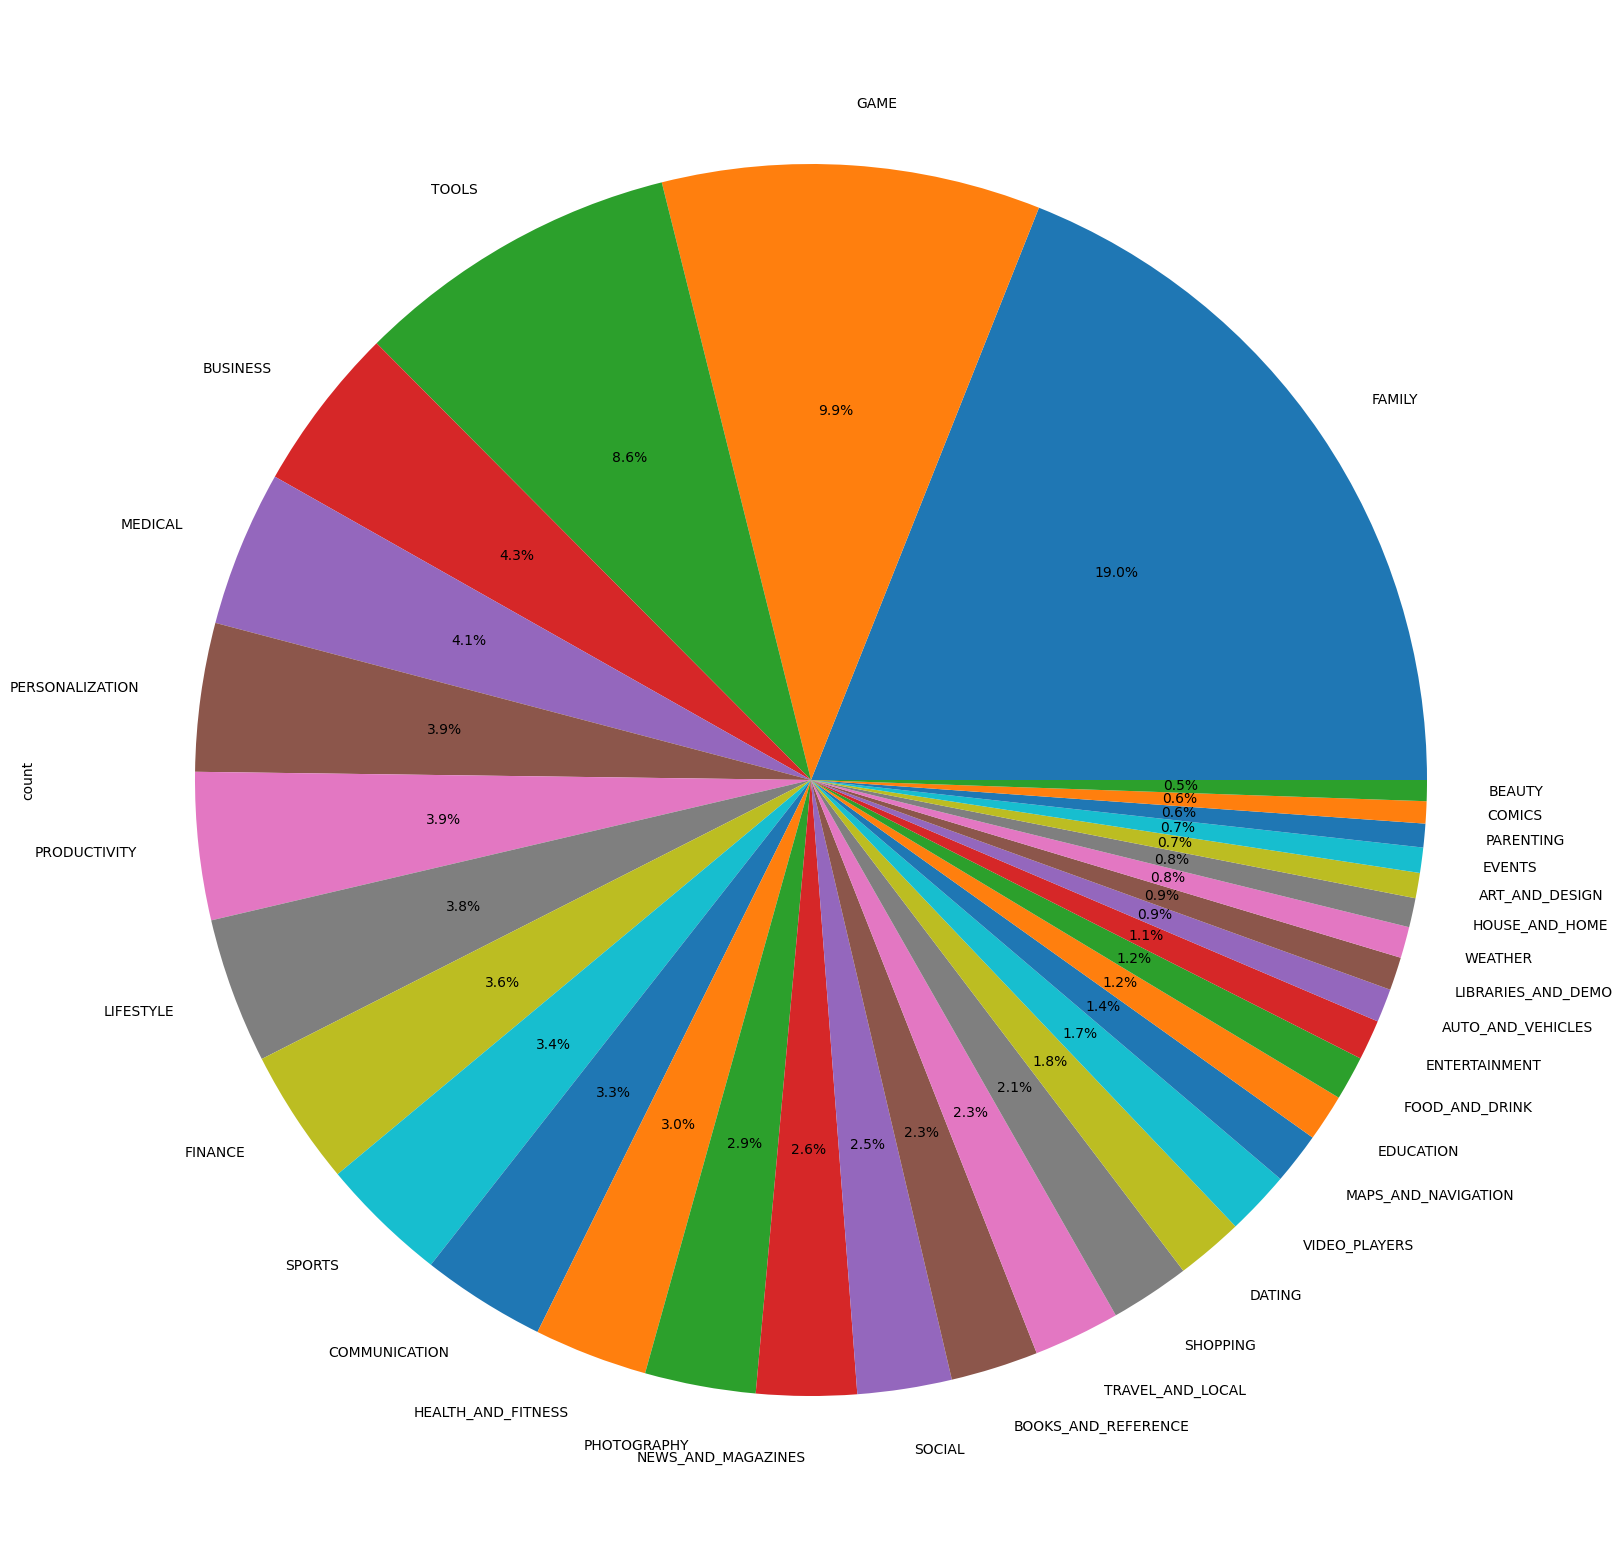

In [ ]:
#Plot a piechart for Category Column
df_copy['Category'].value_counts().plot.pie(y=df_copy['Category'],figsize=(30,20),autopct='%1.1f%%')

Observation:
1. There are more kind of apps in playstore which are under category of family,game,tools and medical.
2. Beauty,comics,art and weather kind of apps are very less in playstore.

In [ ]:
#Category with their count
catg=pd.DataFrame(df_copy['Category'].value_counts())
catg

,count
Category,
FAMILY,1832
GAME,959
TOOLS,827
BUSINESS,420
MEDICAL,395
PERSONALIZATION,376
PRODUCTIVITY,374
LIFESTYLE,369
FINANCE,345


In [ ]:
#Rename the count column by Total Apps
catg.rename(columns={'count':'Total Apps'},inplace=True,errors='')
catg

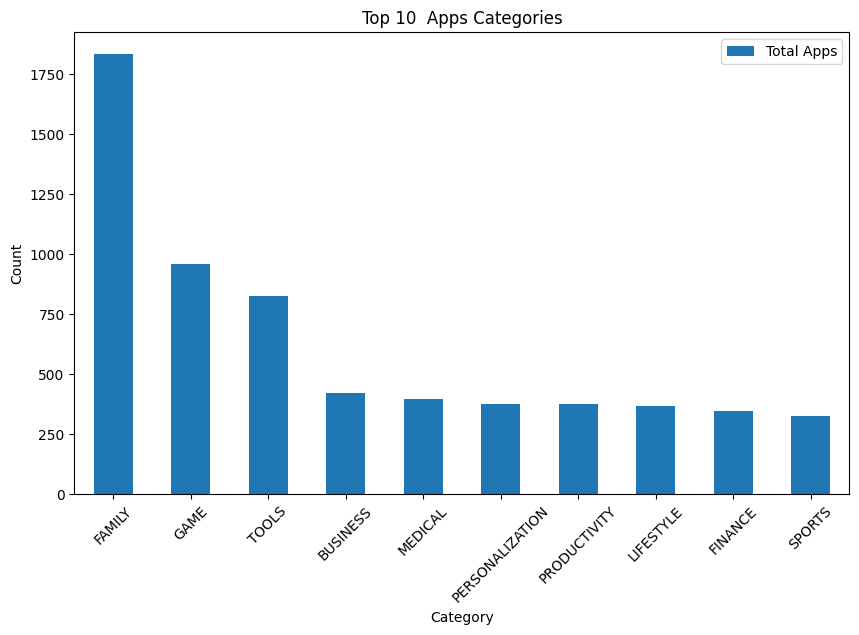

In [ ]:
#Plot top 10 apps as a barchart
top_10_apps=catg.head(10)
top_10_apps.plot(kind='bar',figsize=(10,6))
plt.title('Top 10  Apps Categories')
plt.xlabel('Category')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

Insights:
1. Family Category has the most number of apps with 18% of apps belonging to it, followed by Games category which has 11% of the apps.
2. Least no. of apps belongs to beauty category with less than 1% of the total app belonging to it. 


In [ ]:
#Apps with 5 rating
df_copy[df_copy['Rating']==5]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Day,Month,Year
329,Hojiboy Tojiboyev Life Hacks,COMICS,5.0,15,37000.0,1000,Free,0.0,Everyone,Comics,2018-06-26,2.0,4.0.3 and up,26,6,2018
612,American Girls Mobile Numbers,DATING,5.0,5,4.4,1000,Free,0.0,Mature 17+,Dating,2018-07-17,3.0,4.0.3 and up,17,7,2018
615,Awake Dating,DATING,5.0,2,70000.0,100,Free,0.0,Mature 17+,Dating,2018-07-24,2.2.9,4.4 and up,24,7,2018
633,Spine- The dating app,DATING,5.0,5,9.3,500,Free,0.0,Teen,Dating,2018-07-14,4.0,4.0.3 and up,14,7,2018
636,Girls Live Talk - Free Text and Video Chat,DATING,5.0,6,5.0,100,Free,0.0,Mature 17+,Dating,2018-08-01,8.2,4.0.3 and up,1,8,2018
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10721,Mad Dash Fo' Cash,GAME,5.0,14,16000.0,100,Free,0.0,Everyone,Arcade,2017-06-19,2.5a,4.1 and up,19,6,2017
10742,GKPB FP Online Church,LIFESTYLE,5.0,32,7.9,1000,Free,0.0,Everyone,Lifestyle,2017-12-31,0.7.1,4.4 and up,31,12,2017
10776,Monster Ride Pro,GAME,5.0,1,24000.0,10,Free,0.0,Everyone,Racing,2018-03-05,2.0,2.3 and up,5,3,2018
10820,Fr. Daoud Lamei,FAMILY,5.0,22,8.6,1000,Free,0.0,Teen,Education,2018-06-27,3.8.0,4.1 and up,27,6,2018


In [ ]:
#top 5 most installed apps in each popular category
y=df_copy.groupby('Category',group_keys=False).apply(lambda x: x.nlargest(5,'Installs'))
print(y[['Category','App','Installs']])

            Category                                                App  \
3     ART_AND_DESIGN                              Sketch - Draw & Paint   
12    ART_AND_DESIGN                     Tattoo Name On My Photo Editor   
19    ART_AND_DESIGN                                       ibis Paint X   
42    ART_AND_DESIGN                         Textgram - write on photos   
45    ART_AND_DESIGN  Canva: Poster, banner, card maker & graphic de...   
...              ...                                                ...   
3626         WEATHER  The Weather Channel: Rain Forecast & Storm Alerts   
3628         WEATHER  AccuWeather: Daily Forecast & Live Weather Rep...   
3649         WEATHER   GO Weather - Widget, Theme, Wallpaper, Efficient   
4725         WEATHER                 Weather & Clock Widget for Android   
3630         WEATHER    Weather by WeatherBug: Forecast, Radar & Alerts   

      Installs  
3     50000000  
12    10000000  
19    10000000  
42    10000000  
45    10000000

In [ ]:
#Category with Installation count
df_copy.groupby('Category')['Installs'].value_counts()

Category        Installs
ART_AND_DESIGN  100000      19
                10000       11
                50000        6
                500000       6
                5000         5
                            ..
WEATHER         50000000     4
                500          3
                10           2
                5000         1
                50000        1
Name: count, Length: 512, dtype: int64